In [6]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
left=df[df['left']==1]
left.shape

(3571, 10)

In [8]:
retain=df[df['left']==0]
retain.shape

(11428, 10)

In [11]:
newdf=df.drop(columns=['Department','salary'])
newdf.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

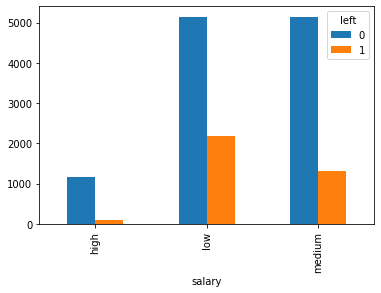

In [13]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')


<AxesSubplot:xlabel='Department'>

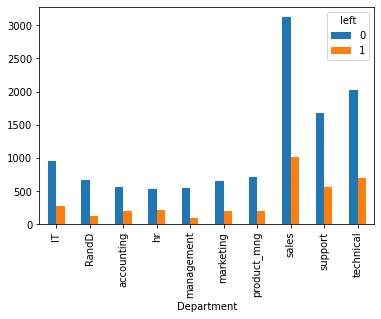

In [15]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

In [21]:
df = df.replace({'low':0, 'medium':1, 'high':2})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0


In [22]:
X = df.drop(columns=['last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'Department','left'])
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0
...,...,...,...,...
14994,0.40,151,0,0
14995,0.37,160,0,0
14996,0.37,143,0,0
14997,0.11,280,0,0


In [23]:
Y = df['left']
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.23)


In [25]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
model.score(X_train,Y_train)

0.7814529396484544

Enter the number of candidates: 1
Candidate 1:
Enter satisfaction level: 0.38
Enter average monthly hours: 152
Enter promotion in the last 5 years (0 or 1): 7
Enter salary (0 for low, 1 for medium, 2 for high): 2
Predicted Probability of Leaving for Candidate 1: 5.6397857112736894e-05


C:\Users\DIVYAJOTHI M\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


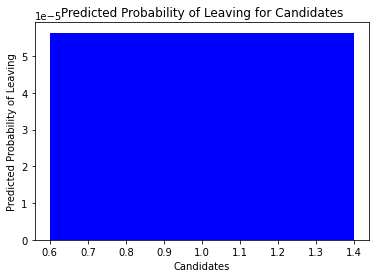

In [33]:
import numpy as np
import matplotlib.pyplot as plt
n = int(input('Enter the number of candidates: '))
predicted_probabilities = []

for i in range(1, n + 1):
    print(f'Candidate {i}:')
    satisfaction_level = float(input('Enter satisfaction level: '))
    average_monthly_hours = int(input('Enter average monthly hours: '))
    promotion_last_5years = int(input('Enter promotion in the last 5 years (0 or 1): '))
    salary = int(input('Enter salary (0 for low, 1 for medium, 2 for high): '))
    candidate_data = np.array([[satisfaction_level, average_monthly_hours, promotion_last_5years, salary]])
    probability = model.predict_proba(candidate_data)[:, 1][0]
    predicted_probabilities.append(probability)

    print(f'Predicted Probability of Leaving for Candidate {i}: {probability}')
candidates = np.arange(1, n + 1)
plt.bar(candidates, predicted_probabilities, color='blue')
plt.xlabel('Candidates')
plt.ylabel('Predicted Probability of Leaving')
plt.title('Predicted Probability of Leaving for Candidates')
plt.show()
